<img src="./src/Monash-logo.jpg" width = "600">

<h1 align="center">EAE 3532 - Physics of the Solid Earth</h1>

## WEEK 1 

The following figure summarises data from Xenolith and calculations providing constraints on two
types of continental geotherms, a “cold” and “warm” geotherm (from Afonso and Ranalli, 2003).

![title](./src/prac1Figure1.JPG)

### TEMPERATURE

Assuming a simple linear increase of the temperature $T$ with depth $z$, plot the temperature profile of
these types of continental geotherms. Assume a function  
  
$$ T = gradient(T) * z $$  
where,  
$$ gradient(T) = \frac {T_{Base} - T_{Surface}}{h}$$  
  
and h is the lithosphere thickness.

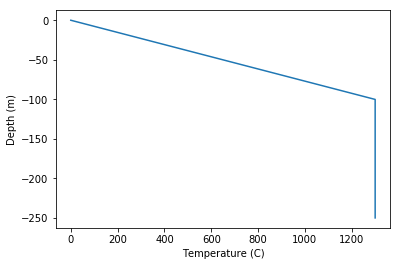

In [16]:
# import the numpy library for arrays and 
# matplotlib for plotting

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ZMAX = 250 # max depth in km
depth = np.arange(ZMAX*1e03+1) # an array of 0 to ZMAX*1000 + 1 with step size 1


T_Mantle = 1300.0 # centigrade
T_Gradient = T_Mantle/1e05 # Normal geotherm C/km
#T_Gradient = T_Mantle/(2 * 1e05) # Craton geotherm C/km
T = depth*T_Gradient

#limit T to 1300
T[T>1300] = 1300
      
# PLOT
plt.plot(T, -depth/1e03)
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)');


### DENSITY

Plot the density following the function,  
  
$$ \rho = \rho_{0} (1 - \alpha T)$$  
where $ \rho_{0} = 3380 kg/m^{3} $ the density of Olivine at room conditions and $ \alpha = 10^{-5}$ 

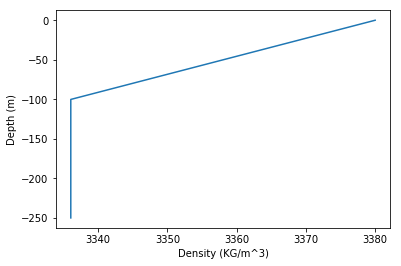

In [17]:
rho_0 = 3380  # density of olivine at room conditions kg/m^3
alpha = 1e-05 # thermal expansivity in 1/C

# density function
rho = rho_0*(1 - alpha*T)

# PLOT
plt.plot(rho, -depth/1e03)
plt.xlabel('Density (KG/m^3)')
plt.ylabel('Depth (m)');

### PRESSURE

Plot the pressure,  

$$ P = \rho g z $$  
using a value $ g = 9.81 m/s^{2} $ and $ \rho = \rho_{0} $   


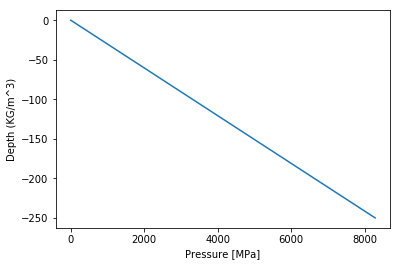

In [18]:
# Pressure Profile NOTE density is not constant with depth

g = 9.81 # gravity acceleration m/s^2
P_const = g * rho_0 * depth

# PLOT
plt.plot(P_const/1e6,-depth/1e3)
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth (KG/m^3)');

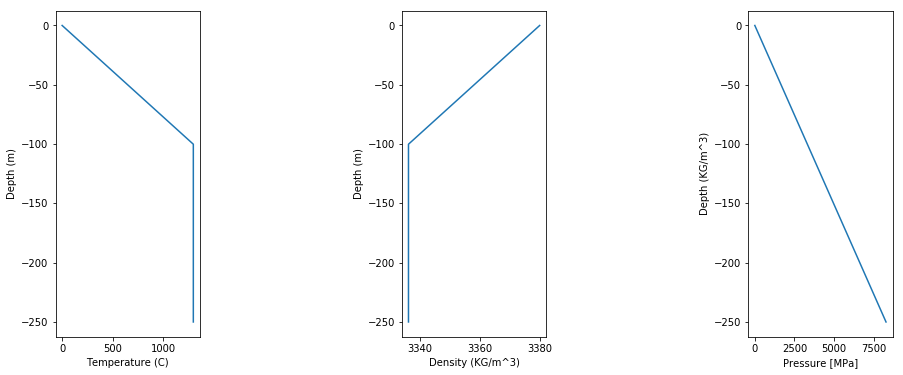

In [19]:
# Temperature, Density and Pressure in one figure
plt.figure(figsize=(15, 6))

plt.subplot(1,5,1)
plt.plot(T, -depth/1e03)
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')

plt.subplot(1,5,3)
plt.plot(rho, -depth/1e03)
plt.xlabel('Density (KG/m^3)')
plt.ylabel('Depth (m)')

plt.subplot(1,5,5)
plt.plot(P_const/1e6,-depth/1e3)
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth (KG/m^3)');


Compare this assumption of a constant density with the integral,  

$$ P(z) = \int_{h} \rho (z) g dz $$

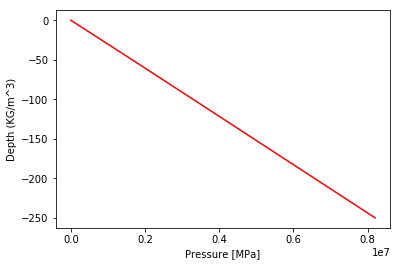

In [20]:
#Pressure Profile NOTE this time the density is an
#integral function P = int(rho(z) g) dz

P = np.empty(len(rho)) # create initial empty array

for i in range(len(rho)):
    P[i] = np.sum(rho[:i])

P = P*g*1e3

# PLOT
plt.plot(P/1e6,-depth/1e3, 'r'); # NOTE THE UNITS!!
plt.xlabel('Pressure [MPa]')
plt.ylabel('Depth (KG/m^3)');

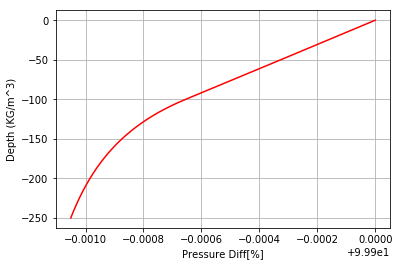

In [21]:
# We can estimate the difference between the Pressures under the two approximations
Diff = P - P_const

# represent it as a percentage and plot it 
Diff_percent = 100*np.divide(Diff[1:],P[1:])

# PLOT
plt.plot(Diff_percent,-depth[1:]/1e3, 'r'); # NOTE THE UNITS!!
plt.xlabel('Pressure Diff[%]')
plt.ylabel('Depth (KG/m^3)')
plt.grid(True);

 ### Questions


1) Describe the pressure profile (linear/non-linear, depth- or density-dependent)  
2) Describe the assumptions of depth-dependent (and density-independent) pressure  
3) What is the Pressure at the base of the cold and warm lithospheres?
